#  DATA ANALYSIS OF CARS DATASET


####  In this Analysis , we have dataset of cars containing all specifications of car and car price .So by using this I am going to predict the expected price of car if any company decides to manufacture a new car. There can be many features  in any car but we first try to find out the featuresof car  which affect the car pricing most then try to predict the price of car. Prediction also depends on the dataset available , larger the dataset more accurate the prediction 

### Importing Essential Libraries of Python 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the csv file

In [2]:
df=pd.read_csv('cars_engage_2022.csv',index_col=0)

In [4]:
df.shape

(1276, 140)

Car Dataset containing the 1276 rows only and 140 columns(Features of Car).As Dataset is very small there is large probability of getting inaccurate prediction.
But let's try to make our predictions with this small dataset only.

In [5]:
# To make all columns Visible

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### To check how much data is not present we are using heatmap 

<AxesSubplot:>

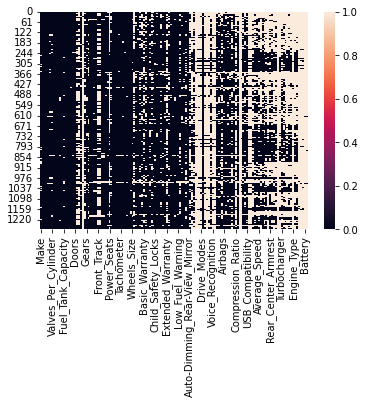

In [8]:
sns.heatmap(df.isnull())

###   % of null values present in specific column

% of missing values in columns the dataset 

In [9]:
missing_data_percent=df.isnull().sum()/df.shape[0] *100
missing_data_percent

Make                  5.877743
Model                 0.000000
Variant               0.000000
Ex-Showroom_Price     0.000000
Displacement          0.940439
                       ...    
USB_Ports            97.727273
Heads-Up_Display     96.003135
Welcome_Lights       94.592476
Battery              98.981191
Electric_Range       98.667712
Length: 140, dtype: float64

###  Data Cleaning 

In [10]:
# remove the colums which contains more unknown values 
# here I am removing the columns which contains moe than 15% null values so that it will be more easy to analyse data
# which is given 

In [11]:
more_null_value_col=[var for var in df.columns if df[var].isnull().sum()/df.shape[0] *100>15]


In [ ]:
# function to delete columns from dataset which contains more missing values more tha 15%

In [12]:
for col in more_null_value_col:
    del df[col]

In [13]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# columns left ater deleting columns in more_null_value_cols

In [15]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm', 'Engine_Location',
       'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length',
       'Width', 'Body_Type', 'Doors', 'ARAI_Certified_Mileage', 'Gears',
       'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension',
       'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering',
       'Power_Windows', 'Power', 'Torque', 'Odometer', 'Speedometer',
       'Tachometer', 'Tripmeter', 'Seating_Capacity', 'Seats_Material', 'Type',
       'Wheelbase', 'Wheels_Size', '12v_Power_Outlet', 'Audiosystem',
       'Boot-lid_Opener', 'Central_Locking', 'Child_Safety_Locks', 'Clock',
       'Cup_Holders', 'Door_Pockets', 'Engine_Malfunction_Light',
       'Fuel-lid_Opener', 'Fuel_Gauge', 'Handbrake', 'Instrument_Console',
       'Low_Fuel_Warning', 'Multifunction_Display', 'Sun_Visor',
       'V

In [16]:
# Heatmap after removing some columns 

<AxesSubplot:>

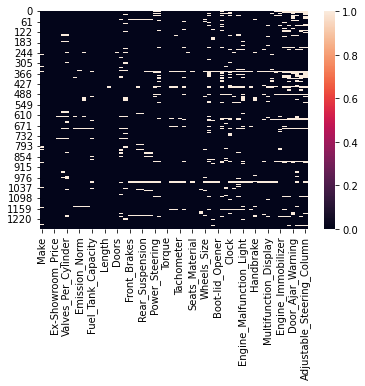

In [17]:
sns.heatmap(df.isnull())

Our data has both numberical and categorical data but most of numerical data is of object.
For data cleaning of numerical data we first need to convert its dataType.

To find the data Type of columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            1201 non-null   object 
 1   Model                           1276 non-null   object 
 2   Variant                         1276 non-null   object 
 3   Ex-Showroom_Price               1276 non-null   object 
 4   Displacement                    1264 non-null   object 
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Drivetrain                      1269 non-null   object 
 8   Cylinder_Configuration          1263 non-null   object 
 9   Emission_Norm                   1265 non-null   object 
 10  Engine_Location                 1233 non-null   object 
 11  Fuel_System                     1268 non-null   object 
 12  Fuel_Tank_Capacity              12

In [19]:
# function to change the format and  data type of currancy

In [20]:
def change_currancy_format(x):
    x=x.replace('Rs.','')
    x=x.replace(',','')
    return x

In [21]:
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].apply(change_currancy_format)

In [22]:
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].astype('float')

In [23]:
df['Ex-Showroom_Price'][0]

292667.0

In [24]:
# Function to change the format of other numerical data columns which contains any floating number and some 
# units in string

In [25]:
import re

In [26]:
def change_format(x):
    if type(x)==str:
        x=re.sub(r"[A-Za-z]", '',x, flags = re.I)
        x=x.replace(',','')
        x=x.replace('/','')
    return float(x)

In [27]:
change_format_col=['Displacement','Fuel_Tank_Capacity','Height','Length','Width','Wheelbase']

In [28]:
for col in change_format_col:
    df[col]=df[col].apply(change_format)

After changing data types of some columns our data frame looks like:

In [29]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.rename(columns = {'Ex-Showroom_Price':'Ex-Showroom_Price_Rs',
                     'Displacement':'Displacement_cc',
                     'Fuel_Tank_Capacity':'Fuel_Tank_Capacity_litres',
                     'Height':'Height_mm',
                     'Length':'Length_mm',
                     'Width':'Width_mm',
                     'Wheelbase':'Wheelbase_mm'
                     }, inplace = True)

After Renaming some column names Our dataset looks like:

In [33]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling the NaN values  of numerical columns

In [34]:
df['Ex-Showroom_Price_Rs'].isnull().sum()

0

In [35]:
df['Displacement_cc'].isnull().sum()

12

<AxesSubplot:xlabel='Displacement_cc', ylabel='Count'>

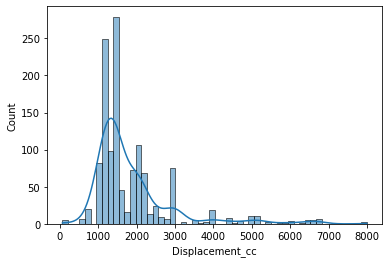

In [36]:
sns.histplot(df['Displacement_cc'],kde=True)

#### Error Found in the dataset 

In [37]:
df['Displacement_cc'].describe()

count    1264.000000
mean     1858.804589
std      1063.152389
min        72.000000
25%      1198.000000
50%      1497.000000
75%      1998.000000
max      7993.000000
Name: Displacement_cc, dtype: float64

### Before filling nan values correlation tables is as follows


In [38]:
df.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.794293,0.820758,0.030392,0.643359,-0.187472,0.401162,0.420144,-0.461746,-0.307198,0.423328,0.338862
Displacement_cc,0.794293,1.000000,0.898620,0.034341,0.798744,-0.025309,0.654299,0.622096,-0.474678,-0.162146,0.650893,0.562368
Cylinders,0.820758,0.898620,1.000000,-0.000935,0.707084,-0.169733,0.543789,0.531906,-0.507423,-0.318495,0.541809,0.458069
Valves_Per_Cylinder,0.030392,0.034341,-0.000935,1.000000,0.046025,-0.072332,0.083042,0.047936,-0.029962,-0.024687,0.072460,0.068139
Fuel_Tank_Capacity_litres,0.643359,0.798744,0.707084,0.046025,1.000000,0.167254,0.795217,0.744368,-0.305433,0.028095,0.803291,0.684106
Height_mm,-0.187472,-0.025309,-0.169733,-0.072332,0.167254,1.000000,0.131762,0.173644,0.527628,0.724973,0.214471,0.039073
Length_mm,0.401162,0.654299,0.543789,0.083042,0.795217,0.131762,1.000000,0.796956,-0.265952,0.127099,0.894219,0.675287
Width_mm,0.420144,0.622096,0.531906,0.047936,0.744368,0.173644,0.796956,1.000000,-0.152151,0.031980,0.718685,0.597562
Doors,-0.461746,-0.474678,-0.507423,-0.029962,-0.305433,0.527628,-0.265952,-0.152151,1.000000,0.521476,-0.156802,-0.220540
Seating_Capacity,-0.307198,-0.162146,-0.318495,-0.024687,0.028095,0.724973,0.127099,0.031980,0.521476,1.000000,0.165413,-0.011740


#### Correlation between Ex-Showroom_Price_Rs and Displacement_cc is 0.794293

In [39]:
# First finding the mean displacment of engine according to manufacturing company then fill the nan values
# with mean displacemnt according to the 'Make' (Company)

In [40]:
avg_displacement=df[['Make','Displacement_cc']].groupby('Make').mean()

In [41]:
df = df.merge(avg_displacement, on = 'Make')

In [42]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc_x,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column,Displacement_cc_y
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1393.319149


In [43]:
df['Displacement_cc_x']=df['Displacement_cc_x'].fillna(df['Displacement_cc_y'])

In [44]:
del df['Displacement_cc_y']


In [45]:
df.rename(columns = {'Displacement_cc_x':'Displacement_cc'}, inplace = True)

In [47]:
df['Displacement_cc'].isnull().sum()

0

In [48]:
df['Ex-Showroom_Price_Rs'].corr(df['Displacement_cc'])

0.7592858176370284

#### After filling NaN values the correlation there is very less difference in correlation between other parameters and displacement .
#### The difference is large if we fill the values with mean , mode or median of displcement of that column

<AxesSubplot:xlabel='Displacement_cc', ylabel='Count'>

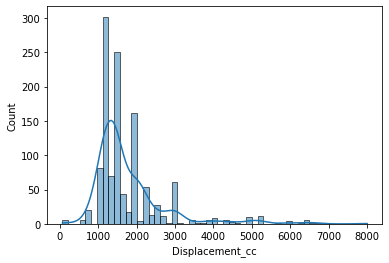

In [49]:
sns.histplot(df['Displacement_cc'],kde=True)

Plot is very similar to the before filling nan values

In [50]:
# Filling missing values of Cylinders

In [51]:
df['Cylinders'].isnull().sum()

66

Cylinders is stronly related with Displacement so we will try to fill missing values using Cylinders data column

In [53]:
df['Cylinders'].corr(df['Displacement_cc'])

0.8734287349462784

In [54]:
df['Cylinders'].value_counts()

4.0     758
3.0     204
6.0      94
8.0      40
12.0     11
5.0      10
10.0     10
2.0       6
16.0      2
Name: Cylinders, dtype: int64

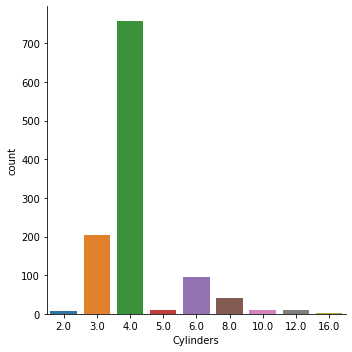

In [55]:
sns.catplot(x='Cylinders',data=df,kind='count')

In [56]:
avg_cyl=df[['Cylinders','Displacement_cc']].groupby('Cylinders').mean()

In [57]:
avg_cyl

,Displacement_cc
Cylinders,
2.0,624.000000
3.0,1158.509804
4.0,1617.571240
5.0,2141.000000
6.0,2670.489362
8.0,4206.500000
10.0,5204.000000
12.0,5968.818182
16.0,7993.000000


In [58]:
avg_cyl.reset_index(level=0,inplace=True)

In [59]:
avg_cyl

,Cylinders,Displacement_cc
0,2.0,624.000000
1,3.0,1158.509804
2,4.0,1617.571240
3,5.0,2141.000000
4,6.0,2670.489362
5,8.0,4206.500000
6,10.0,5204.000000
7,12.0,5968.818182
8,16.0,7993.000000


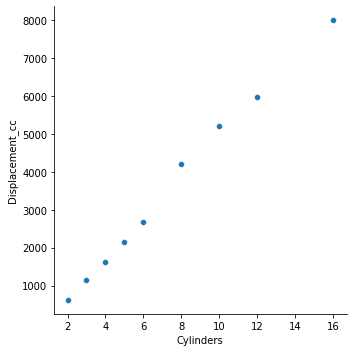

In [60]:
sns.relplot(x='Cylinders',y='Displacement_cc',data=avg_cyl)

In [61]:
# To fill the cylinder columns 

In [62]:
m1 = (df['Displacement_cc'] > 0) & (df['Displacement_cc'] <= 624.0)
m2 = (df['Displacement_cc'] > 624.0) & (df['Displacement_cc'] <= 1159)
m3 = (df['Displacement_cc'] > 1159) & (df['Displacement_cc'] <= 1618)
m4 = (df['Displacement_cc'] >1618) & (df['Displacement_cc'] <= 2141)
m5 = (df['Displacement_cc'] > 2141) & (df['Displacement_cc'] <= 2670)
m6 = (df['Displacement_cc'] >2670) & (df['Displacement_cc'] <= 4206)
m7 = (df['Displacement_cc'] > 4206) & (df['Displacement_cc'] <= 5204)
m8 = (df['Displacement_cc'] > 5204) & (df['Displacement_cc'] <= 5968)
m9 = (df['Displacement_cc'] > 5968)

df.loc[m1,'Cylinders'] = df.loc[m1,'Cylinders'].fillna(2)
df.loc[m2,'Cylinders'] = df.loc[m2,'Cylinders'].fillna(3)
df.loc[m3,'Cylinders'] = df.loc[m3,'Cylinders'].fillna(4)
df.loc[m4,'Cylinders'] = df.loc[m4,'Cylinders'].fillna(5)
df.loc[m5,'Cylinders'] = df.loc[m5,'Cylinders'].fillna(6)
df.loc[m6,'Cylinders'] = df.loc[m6,'Cylinders'].fillna(8)
df.loc[m7,'Cylinders'] = df.loc[m7,'Cylinders'].fillna(10)
df.loc[m8,'Cylinders'] = df.loc[m8,'Cylinders'].fillna(12)
df.loc[m9,'Cylinders'] = df.loc[m9,'Cylinders'].fillna(16)


In [63]:
df['Cylinders'].isnull().sum()

0

In [64]:
df['Cylinders'].corr(df['Displacement_cc'])

0.8763205578220213

After filling all missing values in cylinder columns ,the correlations remains the approx same

In [65]:
# Filling Missing values of Valves_Per_cylinder

In [66]:
df['Valves_Per_Cylinder'].isnull().sum()

100

In [67]:
df.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.029240,0.662164,-0.222622,0.326288,0.412347,-0.447042,-0.313873,0.323534,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.036952,0.809726,-0.025107,0.620092,0.637226,-0.447943,-0.133819,0.603468,0.557842
Cylinders,0.785782,0.876321,1.000000,0.038966,0.703208,-0.186354,0.495071,0.539951,-0.473322,-0.290766,0.469534,0.454746
Valves_Per_Cylinder,0.029240,0.036952,0.038966,1.000000,0.047275,-0.072738,0.083927,0.046102,-0.029517,-0.023035,0.076658,0.074377
Fuel_Tank_Capacity_litres,0.662164,0.809726,0.703208,0.047275,1.000000,0.172434,0.772143,0.744859,-0.262290,0.068424,0.785184,0.660284
Height_mm,-0.222622,-0.025107,-0.186354,-0.072738,0.172434,1.000000,0.141788,0.172871,0.541594,0.737678,0.234704,0.042421
Length_mm,0.326288,0.620092,0.495071,0.083927,0.772143,0.141788,1.000000,0.804796,-0.224421,0.169459,0.883067,0.657126
Width_mm,0.412347,0.637226,0.539951,0.046102,0.744859,0.172871,0.804796,1.000000,-0.126643,0.058776,0.741261,0.591385
Doors,-0.447042,-0.447943,-0.473322,-0.029517,-0.262290,0.541594,-0.224421,-0.126643,1.000000,0.511508,-0.092825,-0.182470
Seating_Capacity,-0.313873,-0.133819,-0.290766,-0.023035,0.068424,0.737678,0.169459,0.058776,0.511508,1.000000,0.225307,0.015576


From the corrrelation Table we can see that Vales_Per_Cylinder is not correlated with any other parameter so we can use mode to fill this parameter  

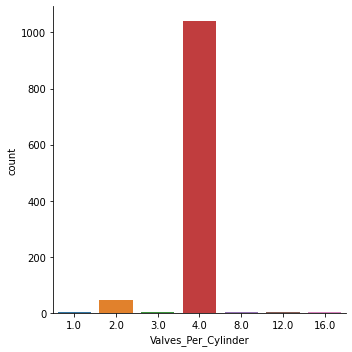

In [68]:
sns.catplot(x='Valves_Per_Cylinder',data=df,kind='count')

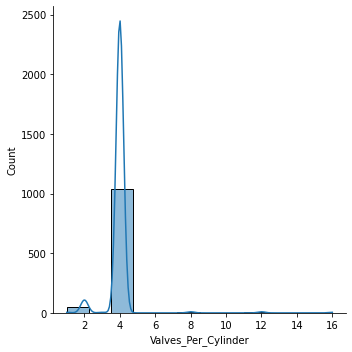

In [69]:
sns.displot(df['Valves_Per_Cylinder'],kde=True)

In [70]:
df['Valves_Per_Cylinder']=df['Valves_Per_Cylinder'].fillna(df['Valves_Per_Cylinder'].mode()[0])

In [71]:
df['Valves_Per_Cylinder'].isnull().sum()

0

Analysing the height, width and length of cars from dataset

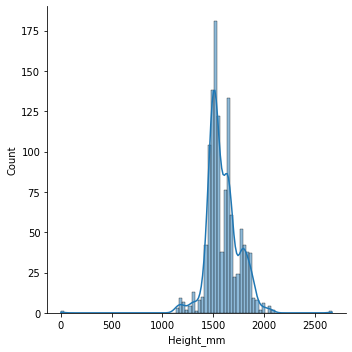

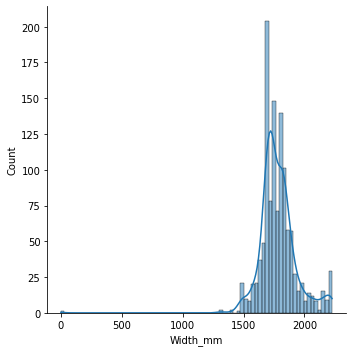

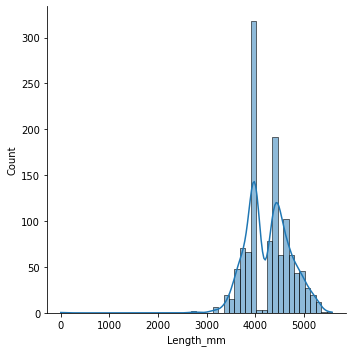

In [72]:
sns.displot(data=df, x='Height_mm',kde=True)
sns.displot(data=df, x='Width_mm',kde=True)
sns.displot(data=df, x='Length_mm',kde=True)

In [73]:
df[['Height_mm','Width_mm','Length_mm']].describe()

,Height_mm,Width_mm,Length_mm
count,1200.000000,1189.000000,1201.000000
mean,1593.565704,1784.149575,4265.018851
std,157.507912,151.842566,457.951058
min,1.845000,1.845000,4.640000
25%,1500.000000,1695.000000,3989.000000
50%,1560.000000,1755.000000,4315.000000
75%,1667.250000,1850.000000,4585.000000
max,2670.000000,2226.000000,5575.000000


From above discription we can found error in length , height and Width columns in the dataset .
Minimum Values of Length, Height and Width of Car can't be too less as in the dataset. 

#### Error found in the dataset 

In [74]:
# function to remove observed errors from length,height and width column

In [75]:
def remove_errors(x):
    if x<10:
        return float(x*1000);
    return float(x)

In [76]:
df['Length_mm']=df['Length_mm'].apply(remove_errors)

In [77]:
df['Height_mm']=df['Height_mm'].apply(remove_errors)

In [78]:
df['Width_mm']=df['Width_mm'].apply(remove_errors)

In [79]:
df[['Height_mm','Width_mm','Length_mm']].describe()

,Height_mm,Width_mm,Length_mm
count,1200.000000,1189.000000,1201.000000
mean,1595.101667,1785.699748,4268.878435
std,150.817886,142.768914,441.243412
min,1136.000000,1312.000000,2752.000000
25%,1500.000000,1695.000000,3989.000000
50%,1560.000000,1755.000000,4315.000000
75%,1671.000000,1850.000000,4585.000000
max,2670.000000,2226.000000,5575.000000


After removing errors

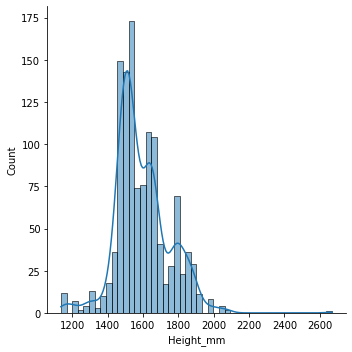

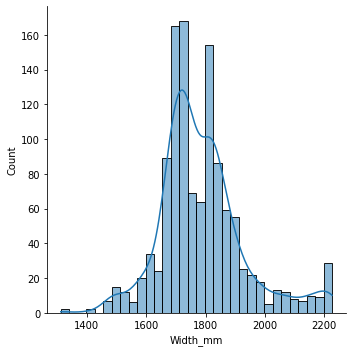

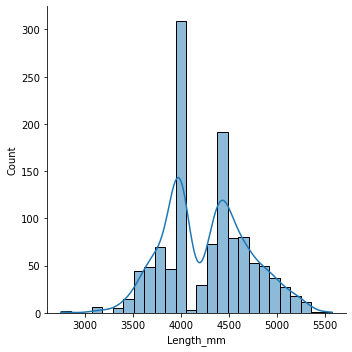

In [80]:
sns.displot(data=df, x='Height_mm',kde=True)
sns.displot(data=df, x='Width_mm',kde=True)
sns.displot(data=df, x='Length_mm',kde=True)

In [81]:
# Checking to missing values

In [82]:
df['Height_mm'].isnull().sum()


1

In [83]:
df['Width_mm'].isnull().sum()


12

In [84]:
df['Length_mm'].isnull().sum()

0

In [85]:
# As missing values are very less we can use mode value directly

In [86]:
df['Height_mm']=df['Height_mm'].fillna(df['Height_mm'].mean())
df['Width_mm']=df['Width_mm'].fillna(df['Width_mm'].mean())

In [87]:
df['Height_mm'].isnull().sum()


0

In [88]:
df['Width_mm'].isnull().sum()


0

In [89]:
# filling missing values of doors

In [90]:
df['Doors'].isnull().sum()

4

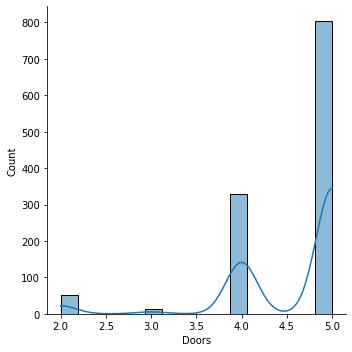

In [91]:
sns.displot(data=df, x='Doors',kde=True)

In [92]:
df['Doors'].mean()

4.576441102756892

In [93]:
df['Doors'].mode()

0    5.0
Name: Doors, dtype: float64

In [94]:
df['Doors']=df['Doors'].fillna(df['Doors'].mode()[0])

In [95]:
df['Doors'].isnull().sum()

0

In [96]:
# Filling the missing values of Seating Capacity 

In [97]:
df['Seating_Capacity'].isnull().sum()

6

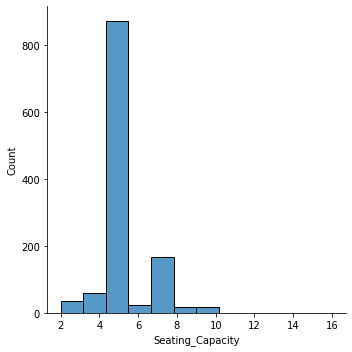

In [98]:
sns.displot(x=df['Seating_Capacity'])

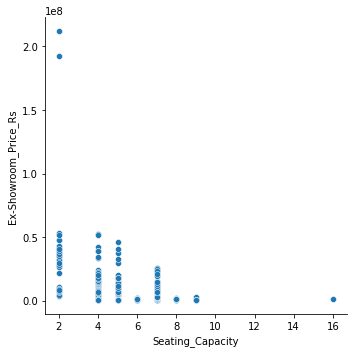

In [99]:
sns.relplot(x='Seating_Capacity',y='Ex-Showroom_Price_Rs',data=df)

Missing values of Seating Capacity is very less so we can fill this with mode value as there is less chance of getting errors 



In [100]:
df['Seating_Capacity']=df['Seating_Capacity'].fillna(df['Seating_Capacity'].mode()[0])

In [101]:
df['Seating_Capacity'].isnull().sum()

0

In [102]:
# Filling the missing values of Wheelbase

In [103]:
df['Wheelbase_mm'].isnull().sum()

19

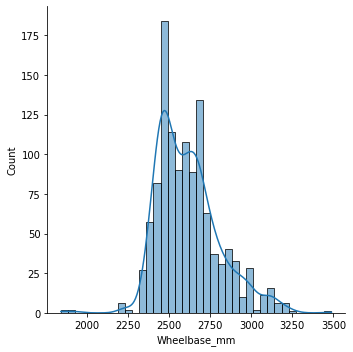

In [104]:
sns.displot(x=df['Wheelbase_mm'],kde=True)

Wheelbase is normally distributed so we can use mean value to fill its missing values and number of missin values is also less so it will not prodoce more error

In [105]:
df['Wheelbase_mm']=df['Wheelbase_mm'].fillna(df['Wheelbase_mm'].mean())

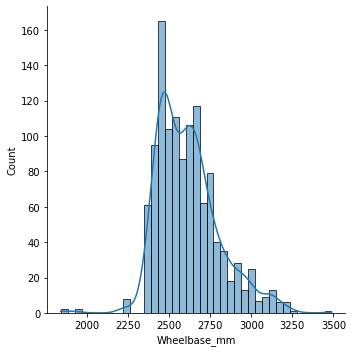

In [106]:
sns.displot(x=df['Wheelbase_mm'],kde=True)

After filling missing values distribution is nearly same as before

In [125]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Checking Airbags data 

In [108]:
df['Number_of_Airbags'].isnull().sum()

132

In [109]:
df['Airbags'].isnull().sum()

129

In [110]:
(df['Number_of_Airbags'].isnull() & df['Airbags'].isnull()).sum()

129

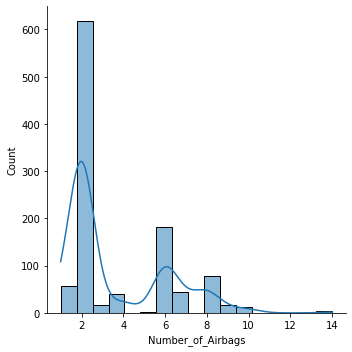

In [111]:
sns.displot(x=df['Number_of_Airbags'],kde=True)

<AxesSubplot:xlabel='Number_of_Airbags', ylabel='Ex-Showroom_Price_Rs'>

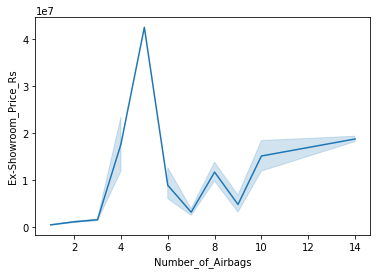

In [112]:
sns.lineplot(x='Number_of_Airbags',y='Ex-Showroom_Price_Rs',data=df)

In [113]:
df['Number_of_Airbags'].corr(df['Ex-Showroom_Price_Rs'])

0.32478673893300375

As number of airbags and price of car is not strongly related we will not select this feature ib our prediction 

In [114]:
# Filling the missing value of Fuel tank Capacity column

In [115]:
df['Fuel_Tank_Capacity_litres'].isnull().sum()

67

In [116]:
df['Fuel_Tank_Capacity_litres'].describe()

count    1134.000000
mean       50.984921
std        15.576145
min        15.000000
25%        40.000000
50%        45.000000
75%        60.000000
max       105.000000
Name: Fuel_Tank_Capacity_litres, dtype: float64

In [117]:
df.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.662164,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.809726,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.703208,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.045299,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.662164,0.809726,0.703208,0.045299,1.000000,0.193946,0.807517,0.801458,-0.257328,0.066608,0.777988,0.660284
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.193946,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.807517,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.801458,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.257328,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.066608,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


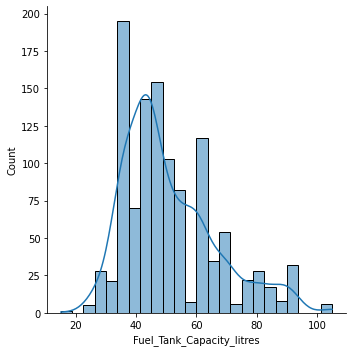

In [118]:
sns.displot(x='Fuel_Tank_Capacity_litres',data=df,kde=True)

<AxesSubplot:xlabel='Fuel_Tank_Capacity_litres', ylabel='Ex-Showroom_Price_Rs'>

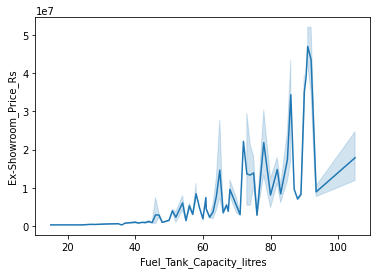

In [119]:
sns.lineplot(x='Fuel_Tank_Capacity_litres',y='Ex-Showroom_Price_Rs',data=df)

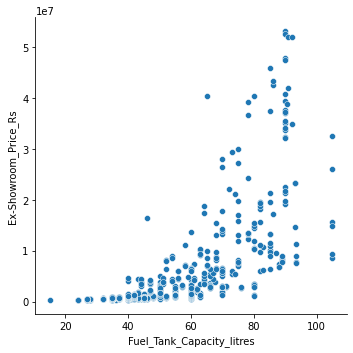

In [120]:
sns.relplot(x='Fuel_Tank_Capacity_litres',y='Ex-Showroom_Price_Rs',data=df)

**********

For filling missing values of fuel tank capacity I am filling the values with different methods , the method which 
is more likely correlated as before will be choosen

In [122]:
# Filling missing vallues with mean 

In [123]:
df2=df[df.columns]

In [124]:
df2['Fuel_Tank_Capacity_litres']=df2['Fuel_Tank_Capacity_litres'].fillna(df2['Fuel_Tank_Capacity_litres'].mean())

<AxesSubplot:xlabel='Fuel_Tank_Capacity_litres', ylabel='Ex-Showroom_Price_Rs'>

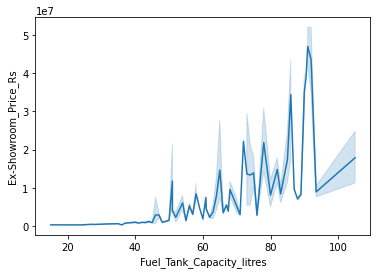

In [125]:
sns.lineplot(x='Fuel_Tank_Capacity_litres',y='Ex-Showroom_Price_Rs',data=df2)

In [126]:
df2.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.429361,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.745943,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.641143,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.044578,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.429361,0.745943,0.641143,0.044578,1.000000,0.186552,0.764435,0.754214,-0.250273,0.064937,0.729757,0.636025
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.186552,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.764435,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.754214,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.250273,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.064937,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


Using mean produces huge correlation difference as before 

In [127]:
# Using median

In [128]:
df3=df[df.columns]

In [129]:
df3.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.662164,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.809726,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.703208,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.045299,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.662164,0.809726,0.703208,0.045299,1.000000,0.193946,0.807517,0.801458,-0.257328,0.066608,0.777988,0.660284
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.193946,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.807517,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.801458,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.257328,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.066608,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


In [130]:
df3['Fuel_Tank_Capacity_litres']=df3['Fuel_Tank_Capacity_litres'].fillna(df3['Fuel_Tank_Capacity_litres'].median())

<AxesSubplot:xlabel='Fuel_Tank_Capacity_litres', ylabel='Ex-Showroom_Price_Rs'>

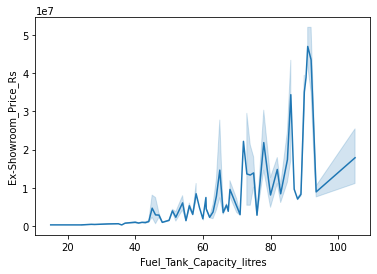

In [131]:
sns.lineplot(x='Fuel_Tank_Capacity_litres',y='Ex-Showroom_Price_Rs',data=df3)

In [133]:
df3.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.411926,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.731752,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.629370,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.047763,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.411926,0.731752,0.629370,0.047763,1.000000,0.176216,0.748699,0.735891,-0.251199,0.068558,0.714161,0.621636
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.176216,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.748699,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.735891,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.251199,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.068558,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


Using median also produces huge correlation difference as before 

#### Using Above Approaches we can find that there will be huge error if we try  to fill Fuel_Tank_Capacity With mean, mode or median values as missing values are also more in number so we don't use these for further good Analysis

#### Using Regression Model we are going to fill these NaN values 

In [134]:
# Using any temporary dataset to find if it is good to use regression model to fill nan values

In [135]:
df4=df[df.columns]

In [136]:
df4.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.662164,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.809726,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.703208,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.045299,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.662164,0.809726,0.703208,0.045299,1.000000,0.193946,0.807517,0.801458,-0.257328,0.066608,0.777988,0.660284
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.193946,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.807517,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.801458,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.257328,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.066608,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


We can observe from above that Ex-Showroom_Price_Rs	and Displacement_cc are more related with Fuel_Tank_Capacity so
I am going to use these parameters to find regression line than fill nan values according to the line, By this there is less cahnce of getting errors

In [137]:
df5=df[['Ex-Showroom_Price_Rs','Displacement_cc','Fuel_Tank_Capacity_litres']]

In [138]:
df5=df5.dropna()

In [139]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ex-Showroom_Price_Rs       1134 non-null   float64
 1   Displacement_cc            1134 non-null   float64
 2   Fuel_Tank_Capacity_litres  1134 non-null   float64
dtypes: float64(3)
memory usage: 35.4 KB


In [140]:
x=df5[['Ex-Showroom_Price_Rs','Displacement_cc']]

In [141]:
y=df5['Fuel_Tank_Capacity_litres']

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [143]:
lr.fit(x,y)

LinearRegression()

In [144]:
lr.coef_

array([-3.50579018e-07,  1.63121218e-02])

In [145]:
lr.intercept_

23.551868076838996

In [146]:
# y=-3.50579018e-07*df['Ex-Showroom_Price_Rs']+1.63121218e-02*df['Displacement_cc'+23.551868076838996]

In [147]:
df4['Fuel_Tank_Capacity_litres']=df4['Fuel_Tank_Capacity_litres'].fillna(-3.50579018e-07*df4['Ex-Showroom_Price_Rs']+1.63121218e-02*df['Displacement_cc']+23.551868076838996)

In [148]:
df4.corr()

,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
Ex-Showroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.512490,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.812177,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.704314,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.043794,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.512490,0.812177,0.704314,0.043794,1.000000,0.187813,0.788650,0.793835,-0.251465,0.056074,0.753805,0.655419
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.187813,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.788650,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.793835,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.251465,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.056074,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


<AxesSubplot:xlabel='Fuel_Tank_Capacity_litres', ylabel='Ex-Showroom_Price_Rs'>

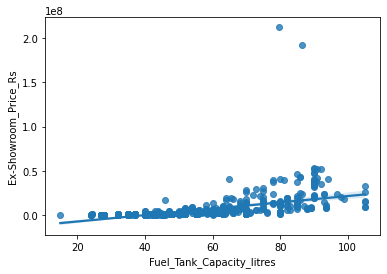

In [149]:
sns.regplot(y='Ex-Showroom_Price_Rs',x='Fuel_Tank_Capacity_litres',data=df4)

In [150]:
# From above observation we can find that using regression model to fill nan values of Fuel_Tank_Capacity_litres.

In [151]:
df['Fuel_Tank_Capacity_litres']=df['Fuel_Tank_Capacity_litres'].fillna(-3.50579018e-07*df['Ex-Showroom_Price_Rs']+1.63121218e-02*df['Displacement_cc']+23.551868076838996)

In [152]:
df['Fuel_Tank_Capacity_litres'].isnull().sum()

0

Doors 

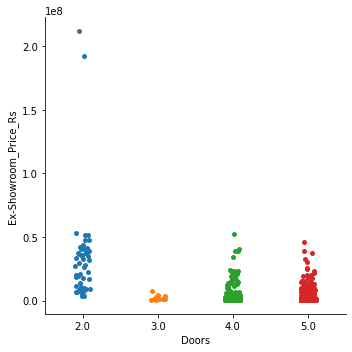

In [157]:
sns.catplot(y='Ex-Showroom_Price_Rs',x='Doors',data=df)

<AxesSubplot:xlabel='Doors', ylabel='Ex-Showroom_Price_Rs'>

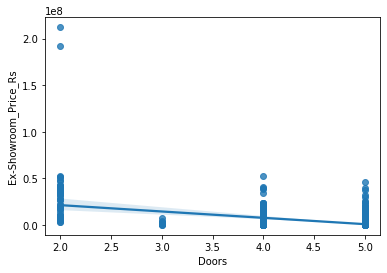

In [160]:
sns.regplot(y='Ex-Showroom_Price_Rs',x='Doors',data=df)

Seating_Capacity

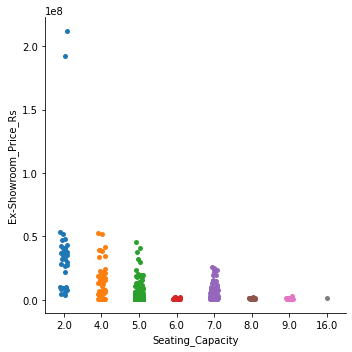

In [161]:
sns.catplot(y='Ex-Showroom_Price_Rs',x='Seating_Capacity',data=df)

<AxesSubplot:xlabel='Seating_Capacity', ylabel='Ex-Showroom_Price_Rs'>

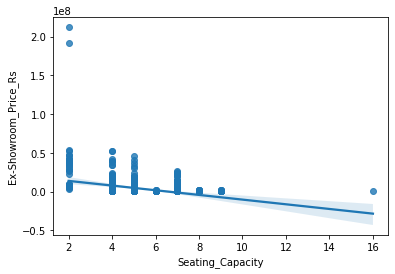

In [162]:
sns.regplot(y='Ex-Showroom_Price_Rs',x='Seating_Capacity',data=df)

###  Analysing Numerical Data Columns

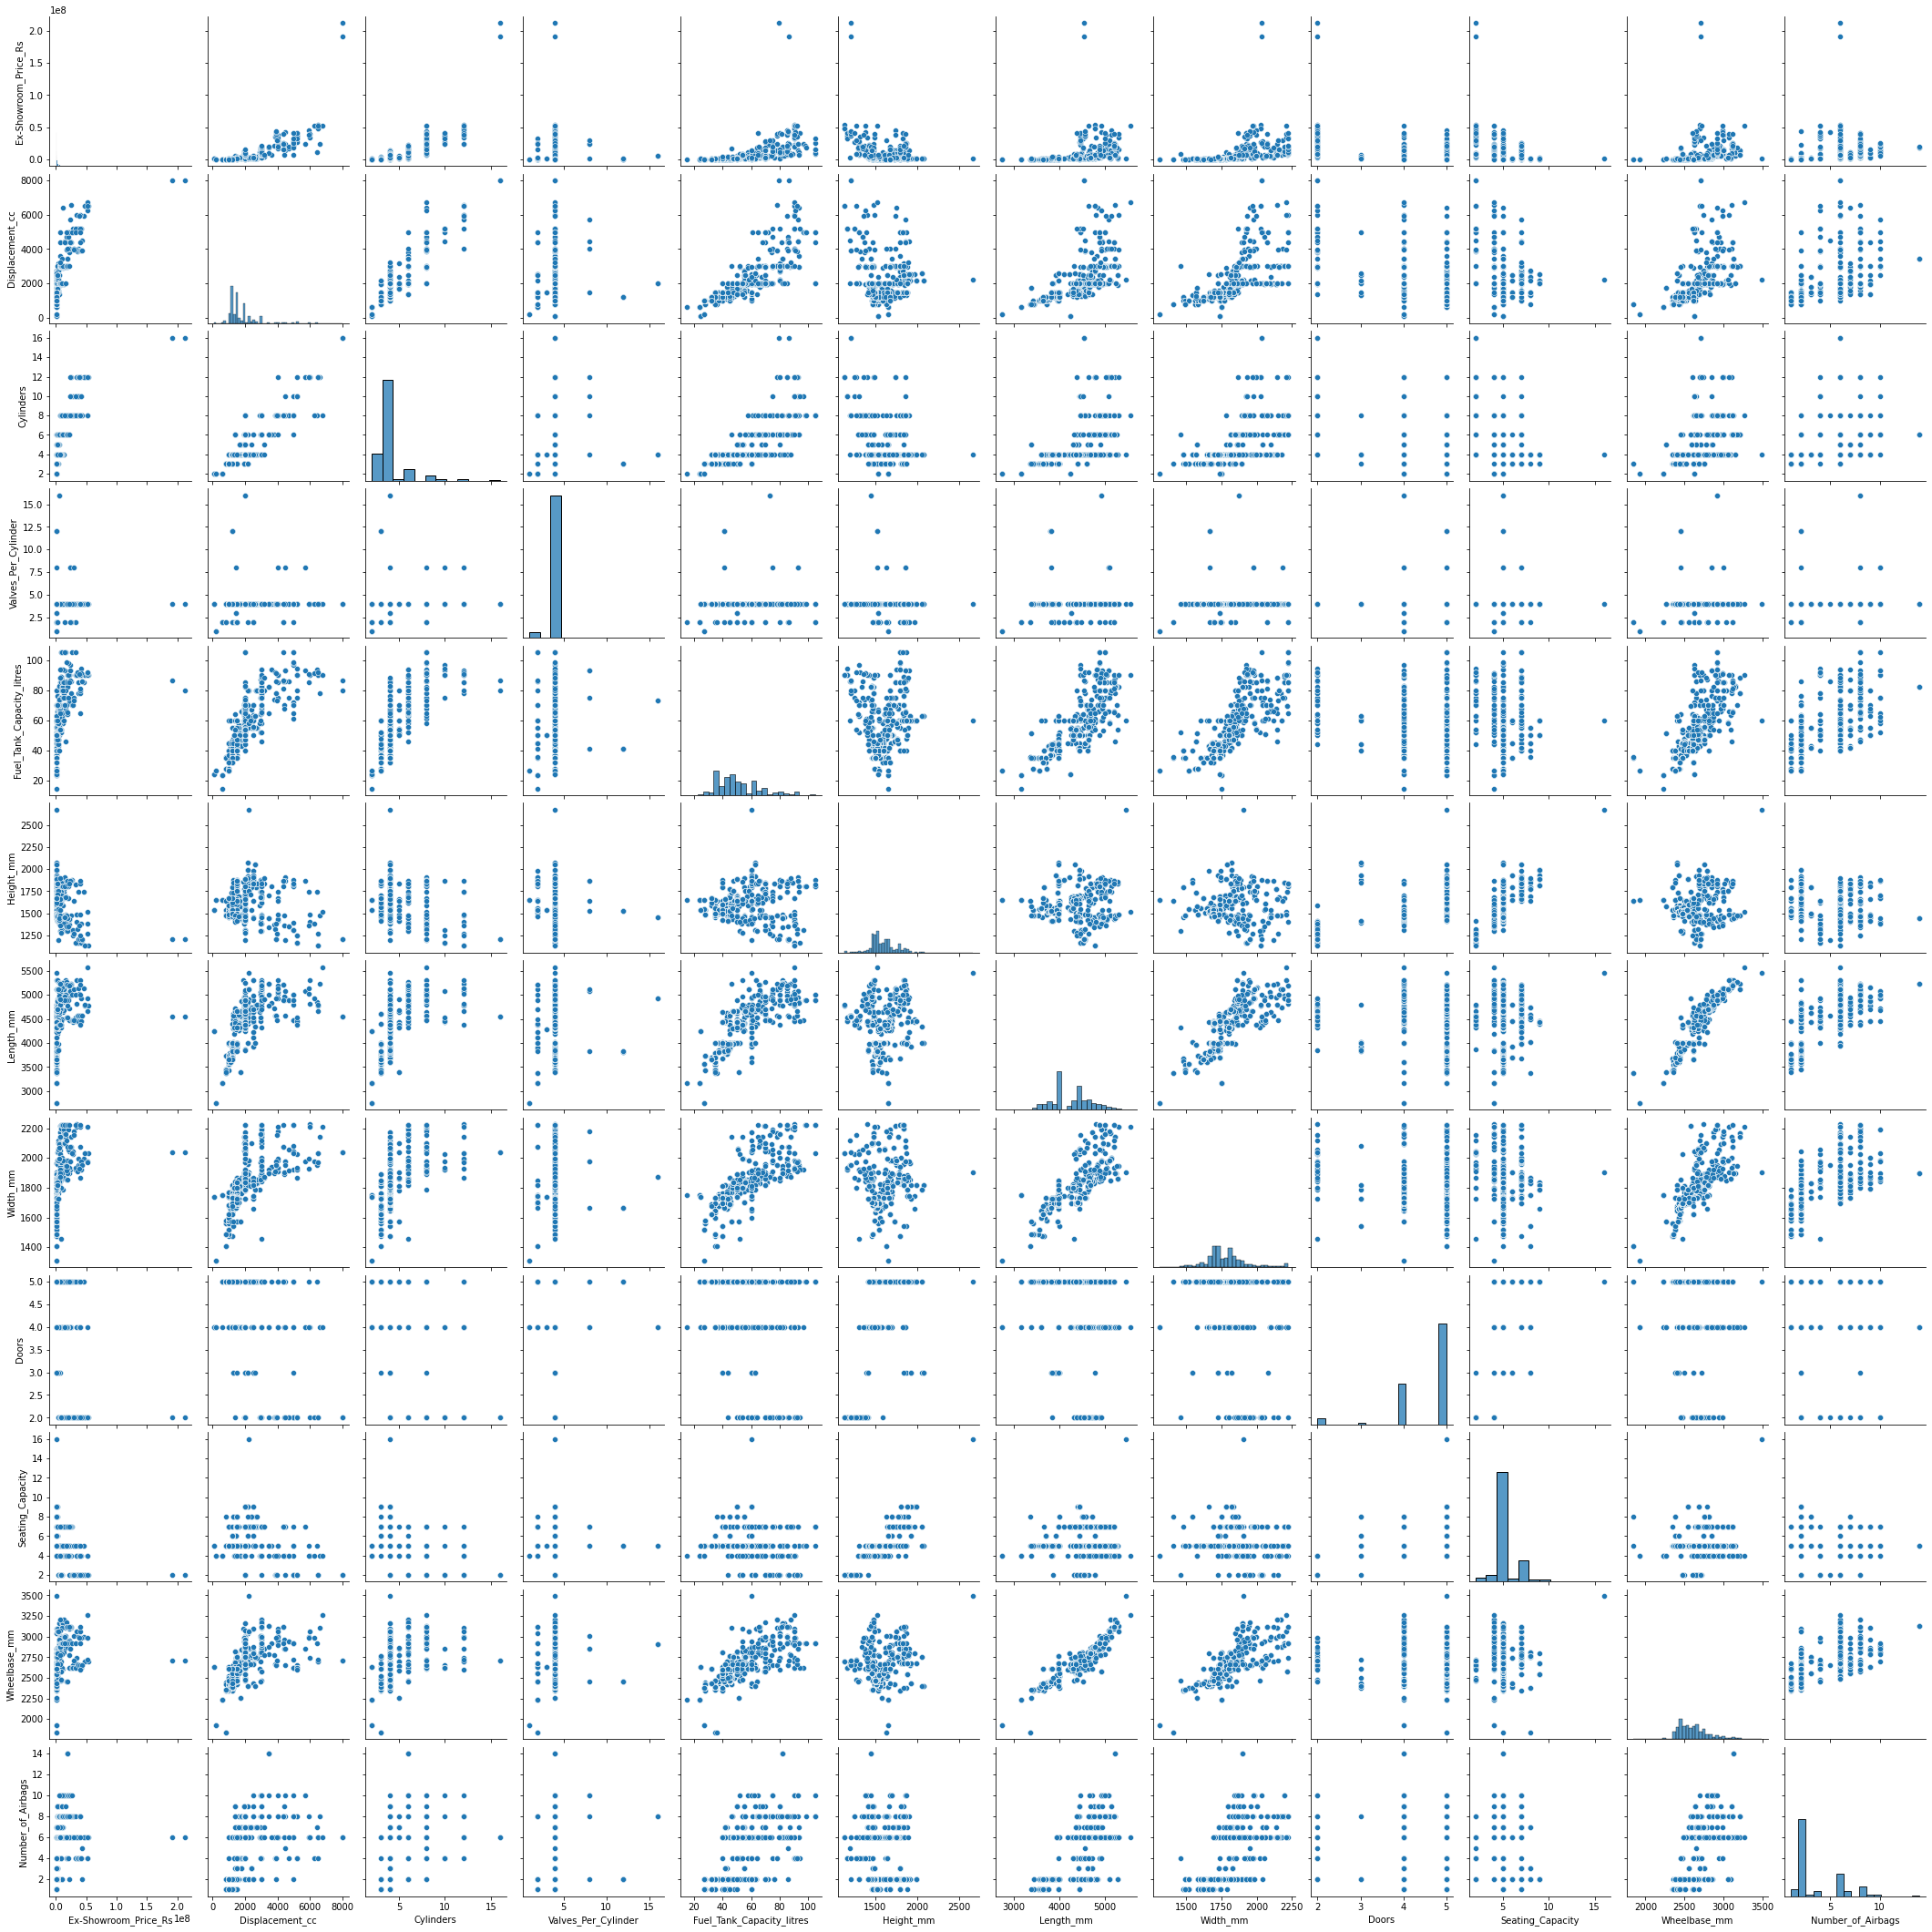

In [163]:
sns.pairplot(df)

In [164]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualising columns which do not contain numeric data

In [ ]:
# Visualization of data for some queries for available data only , not filling the nan values as they are of Non-Numeric and if we 
# try to fill them then it can cause error in observation 

In [165]:
df['Make'].value_counts()

Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Lamborghini          13
Mg                   13
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Bentley               6
Premier               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: Make, dtype: int64

###  Analysing the average price of car made by any specific company . 

In [ ]:
# Average price of car made by any company


In [166]:
avg=df[['Make','Ex-Showroom_Price_Rs']].groupby('Make').mean()
avg

,Ex-Showroom_Price_Rs
Make,
Aston Martin,3.626744e+07
Audi,7.240431e+06
Bajaj,2.730000e+05
Bentley,4.056585e+07
Bmw,8.256216e+06
Bugatti,2.021492e+08
Datsun,4.509077e+05
Dc,3.407407e+06
Ferrari,4.287250e+07


<AxesSubplot:ylabel='Frequency'>

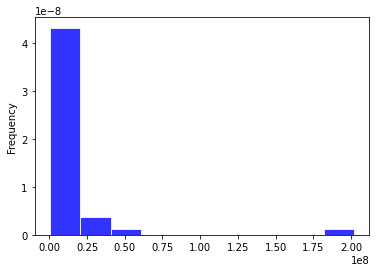

In [168]:
avg['Ex-Showroom_Price_Rs'].plot(kind='hist' ,bins=10, density = 1, color ='blue', edgecolor="white",alpha=0.8)

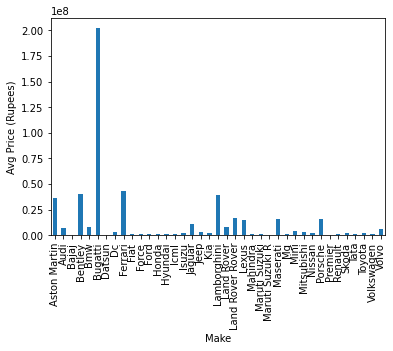

In [169]:
plt1=df[['Make','Ex-Showroom_Price_Rs']].groupby('Make').mean().plot(kind='bar',legend=False)
plt1.set_xlabel("Make")
plt1.set_ylabel("Avg Price (Rupees)")
# xticks(rotation = 0)
plt.show()

Drivetrain data

In [170]:
df['Drivetrain'].value_counts()

FWD (Front Wheel Drive)    869
RWD (Rear Wheel Drive)     140
AWD (All Wheel Drive)      133
4WD                         53
Name: Drivetrain, dtype: int64

#####  Most of the car have FWD (Front Wheel Drive)

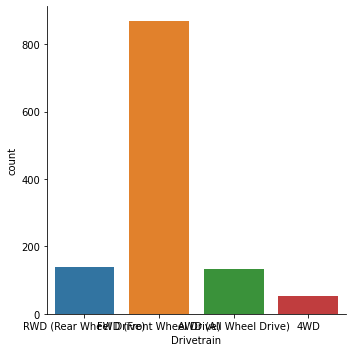

In [171]:
sns.catplot(x='Drivetrain',kind='count',data=df,legend=False)

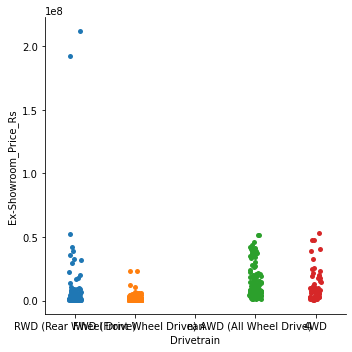

In [172]:
sns.catplot(x='Drivetrain',y='Ex-Showroom_Price_Rs',data=df,legend=False)

Drivetrain does not affect Ex-Showroom Price more strongy as we can observe from above plot

In [173]:
df['Cylinder_Configuration'].value_counts()

In-line    1038
V           140
W             6
Flat          4
Name: Cylinder_Configuration, dtype: int64

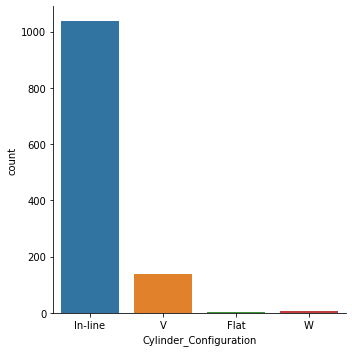

In [174]:
sns.catplot(x='Cylinder_Configuration',kind='count',data=df,legend=False)

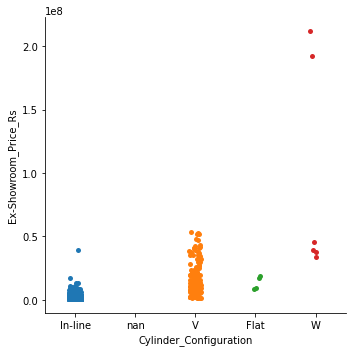

In [175]:
sns.catplot(x='Cylinder_Configuration',y='Ex-Showroom_Price_Rs',data=df,legend=False)

In [176]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df['Emission_Norm'].value_counts()

BS IV     824
BS 6      338
BS VI      19
BS III      9
Name: Emission_Norm, dtype: int64

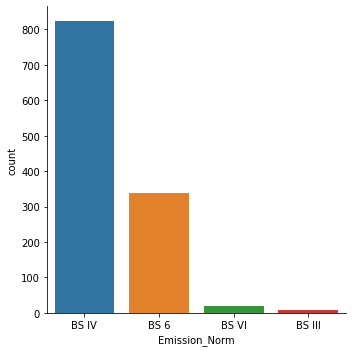

In [178]:
sns.catplot(x='Emission_Norm',kind='count',data=df,legend=False)

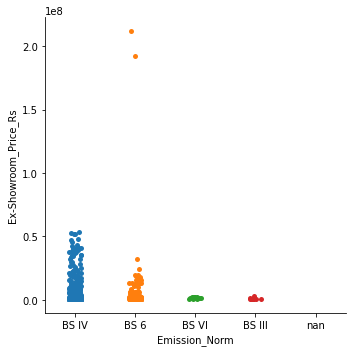

In [179]:
sns.catplot(x='Emission_Norm',y='Ex-Showroom_Price_Rs',data=df,legend=False)

In [180]:

df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df['Engine_Location'].value_counts()

Front, Transverse       777
Front, Longitudinal     357
Rear, Transverse         16
Rear Mid, Transverse      3
Mid, Longitudinal         2
Mid, Transverse           2
Rear, Longitudinal        1
Name: Engine_Location, dtype: int64

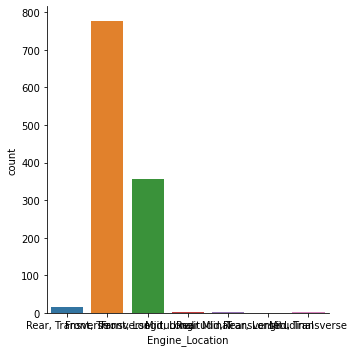

In [182]:
sns.catplot(x='Engine_Location',kind='count',data=df,legend=False)

Widely Engine locations choosed for cars are:
Front, Transverse      
Front, Longitudinal

In [183]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df['Fuel_System'].value_counts()

Injection    1189
PGM - Fi        4
Name: Fuel_System, dtype: int64

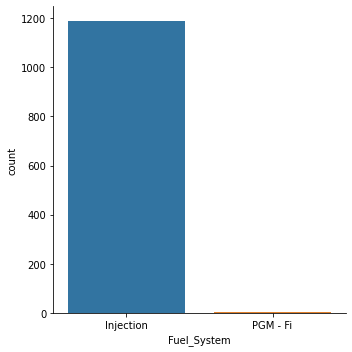

In [185]:
sns.catplot(x='Fuel_System',kind='count',data=df,legend=False)

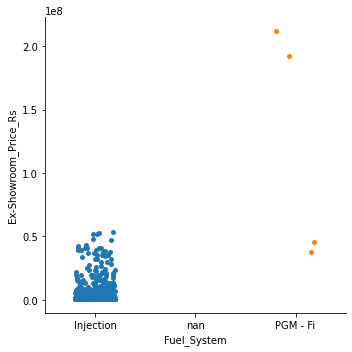

In [186]:
sns.catplot(x='Fuel_System',y='Ex-Showroom_Price_Rs',data=df,legend=False)

We can conclude that mostly Fuel_System used is Injection but in some Expensive Cars Fuel system PGM-Fi is used

In [187]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df['Fuel_Type'].value_counts()

Petrol          595
Diesel          555
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

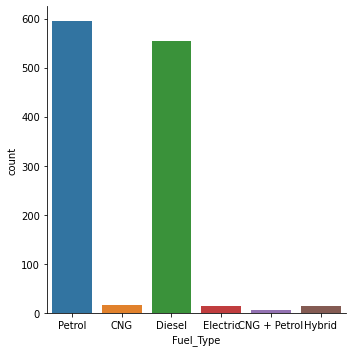

In [189]:
sns.catplot(x='Fuel_Type',kind='count',data=df,legend=False)

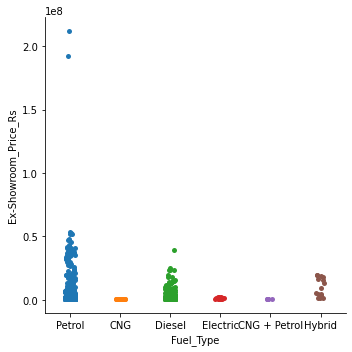

In [190]:
sns.catplot(x='Fuel_Type',y='Ex-Showroom_Price_Rs',data=df,legend=False)

We can conclude that most car have fuel type petrol or diesel 
And in expensive cars are mostly Petrol Fuel type

In [191]:
df.head(1)

,Make,Model,Variant,Ex-Showroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df.rename(columns = {'Ex-Showroom_Price_Rs':'ExShowroom_Price_Rs'}, inplace = True)

In [193]:
df.head(1)

,Make,Model,Variant,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df['Body_Type'].value_counts()

SUV                    428
Hatchback              314
Sedan                  308
MUV                     37
Coupe                   33
MPV                     25
Crossover               18
Convertible             15
Sports                   3
Pick-up                  3
Crossover, SUV           2
SUV, Crossover           2
Sports, Convertible      2
Sedan, Coupe             2
Sports, Hatchback        1
Sedan, Crossover         1
Coupe, Convertible       1
Name: Body_Type, dtype: int64

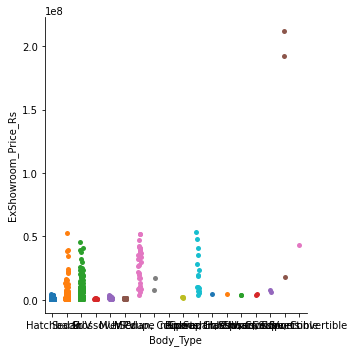

In [195]:
sns.catplot(x='Body_Type',y='ExShowroom_Price_Rs',data=df,legend=False)

In [196]:
# try to figure out for  cars less than 5 crores

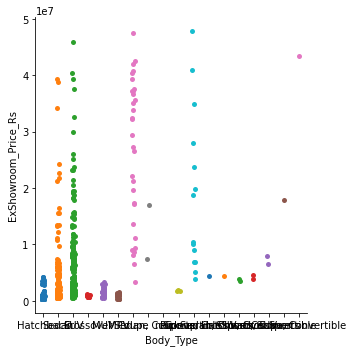

In [197]:
sns.catplot(x='Body_Type',y='ExShowroom_Price_Rs',data=df.query(" ExShowroom_Price_Rs<50000000 "),legend=False)

#### If any company want to manufacture any car of specific body type then what can be its dimensions  

In [198]:
dfl=df[['Body_Type','Length_mm']].groupby('Body_Type').mean()


In [199]:
dfw=df[['Body_Type','Width_mm']].groupby('Body_Type').mean()


In [200]:
dfh=df[['Body_Type','Height_mm']].groupby('Body_Type').mean()


In [201]:
dfnew=dfl.merge(dfw,on='Body_Type')

In [202]:
dfnew=dfnew.merge(dfh,on='Body_Type')

In [204]:
dfnew

,Length_mm,Width_mm,Height_mm
Body_Type,,,
Convertible,4510.000000,1911.800000,1316.266667
Coupe,4583.121212,1949.293932,1277.275808
"Coupe, Convertible",4568.000000,1952.000000,1211.000000
Crossover,4019.277778,1721.888889,1565.944444
"Crossover, SUV",4439.000000,1940.500000,1612.000000
Hatchback,3791.127389,1674.538217,1545.595541
MPV,4227.400000,1702.120000,1736.080000
MUV,4636.729730,1815.756757,1766.648649
Pick-up,5295.000000,1860.000000,1845.000000


From the available dataset we can find the average length , width and height of car of specific body type.
This can be used in manufacturing any new car of any specific body_type

####  Length and Width Ratio according to Body type of car

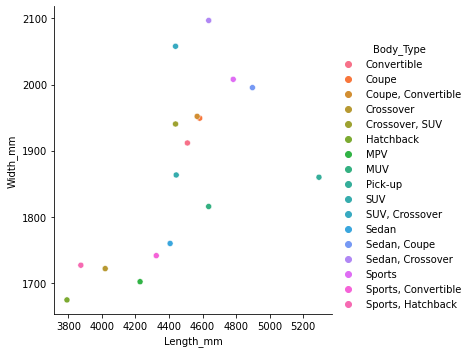

In [205]:
sns.relplot(x = 'Length_mm', y = 'Width_mm', data = dfnew,hue='Body_Type')

#### Length and Height Ratio according to Body type of car 

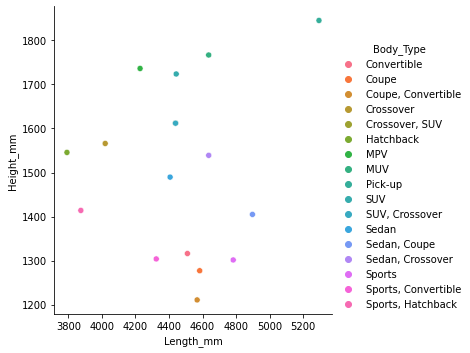

In [206]:
sns.relplot(x = 'Length_mm', y = 'Height_mm', data = dfnew,hue='Body_Type')

Seat Material

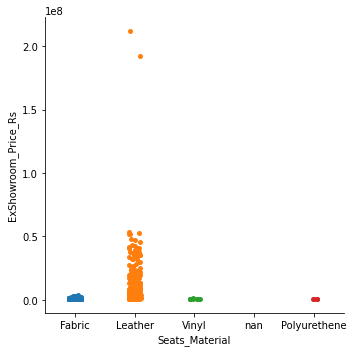

In [207]:
sns.catplot(x='Seats_Material',y='ExShowroom_Price_Rs',data=df)

In [208]:
# For closer visualization of less expensive cars

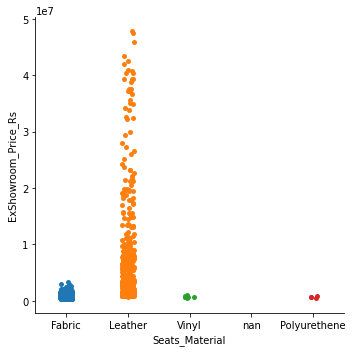

In [209]:
sns.catplot(x='Seats_Material',y='ExShowroom_Price_Rs',data=df.query(" ExShowroom_Price_Rs<50000000 "))

Mostly Seat material of Cars is Leather and in most Expensive cars Leather seats are used only


HandBrake

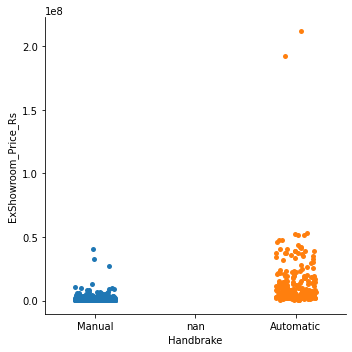

In [210]:
sns.catplot(x='Handbrake',y='ExShowroom_Price_Rs',data=df)

In [211]:
# For Clear visualization select rows where ExShowroom_Price_Rs<50000000 as most of data lies in this range


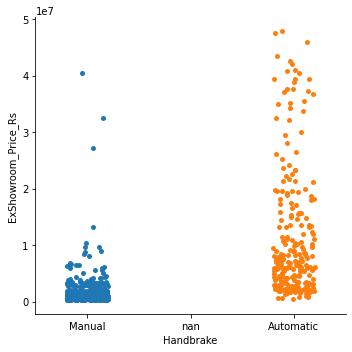

In [212]:
sns.catplot(x='Handbrake',y='ExShowroom_Price_Rs',data=df.query(" ExShowroom_Price_Rs<50000000 "))

Manual Brakes are widly used in less Expensive Cars 

Gears:

In [213]:
df['Gears'].value_counts()

5                              605
6                              233
8                              130
7                              107
4                               16
9                               15
Single Speed Reduction Gear      1
7 Dual Clutch                    1
Name: Gears, dtype: int64

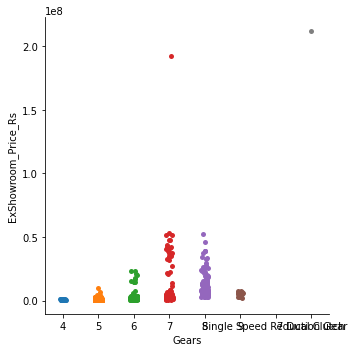

In [214]:
sns.catplot(x='Gears',y='ExShowroom_Price_Rs',data=df,order=['4','5','6','7','8','9','Single Speed Reduction Gear ','7 Dual Clutch'])

In [215]:
# For Clear Visualization select rows where ExShowroom_Price_Rs<50000000 only 

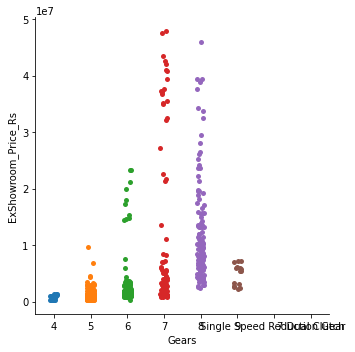

In [216]:
sns.catplot(x='Gears',y='ExShowroom_Price_Rs',data=df.query(" ExShowroom_Price_Rs<50000000 "),order=['4','5','6','7','8','9','Single Speed Reduction Gear ','7 Dual Clutch'])

Single Speed Reduction Gear      
7 Dual Clutch   
Thses gears are used in most Expensive Cars only

In [217]:
tempdf=df[df.columns]

In [252]:
t2=tempdf[tempdf.columns]

In [253]:
t2.head(1)

,Make,Model,Variant,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df=tempdf[tempdf.columns]

In [319]:
# Some More plots to find the relation between categorical data and Price of car

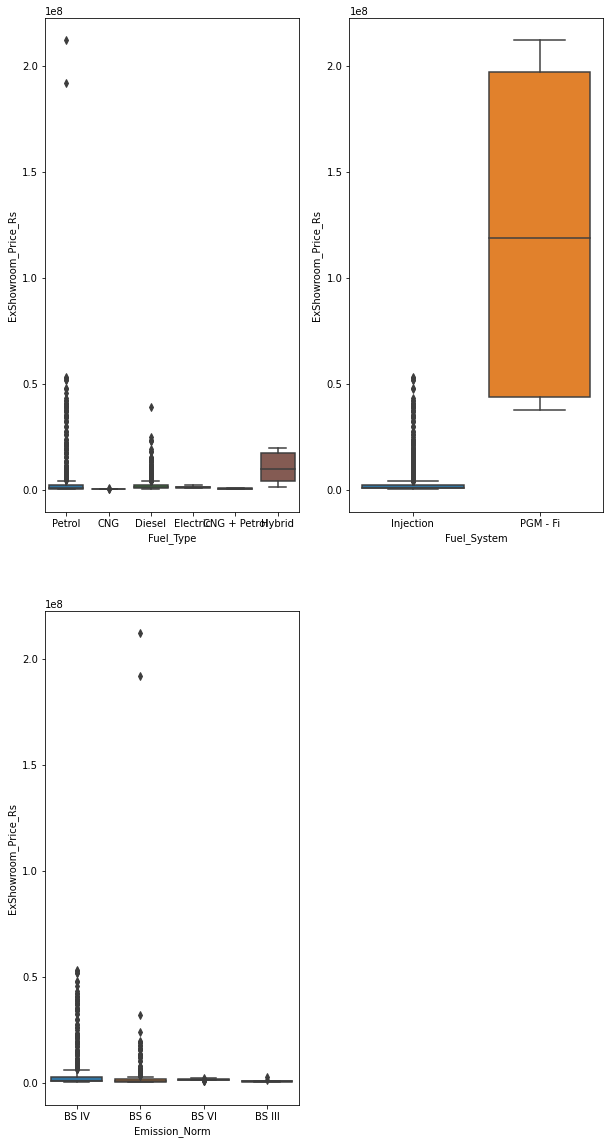

In [322]:
plt.figure(figsize=(10, 20))
plt.subplot(2,2,1)
sns.boxplot(x = 'Fuel_Type', y = 'ExShowroom_Price_Rs', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Fuel_System', y = 'ExShowroom_Price_Rs', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Emission_Norm', y = 'ExShowroom_Price_Rs', data = df)
plt.show()

## Prediction of Car Price using some features only

Making prdictions using simple linear Regression model 
As the dataset is very small we we will not make predictions highly accuratly  

In [288]:
df.head(1)

,Make,Model,Variant,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litres,Fuel_Type,Height_mm,Length_mm,Width_mm,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase_mm,Wheels_Size,12v_Power_Outlet,Audiosystem,Boot-lid_Opener,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Door_Pockets,Engine_Malfunction_Light,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Multifunction_Display,Sun_Visor,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24.0,Petrol,1652.0,3164.0,1750.0,Hatchback,5.0,23.6 km/litre,4,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",135/70R12,155/65R12,Electric Power,Only Front Windows,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230.0,4 B X 12,Yes,CD Player with USB & Aux-in,Internal,Yes,Yes,Digital,Front,Front,Yes,Internal,Digital,Manual,Analog + Digital,Yes,Yes,Driver & Front Passenger,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
df.corr()

,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Wheelbase_mm,Number_of_Airbags
ExShowroom_Price_Rs,1.000000,0.759286,0.785782,0.028599,0.512490,-0.233239,0.340344,0.440404,-0.445233,-0.313771,0.323303,0.324787
Displacement_cc,0.759286,1.000000,0.876321,0.035288,0.812177,-0.022246,0.650039,0.685217,-0.445537,-0.134216,0.601299,0.557842
Cylinders,0.785782,0.876321,1.000000,0.037648,0.704314,-0.196025,0.523792,0.585039,-0.469995,-0.289440,0.466297,0.454746
Valves_Per_Cylinder,0.028599,0.035288,0.037648,1.000000,0.043794,-0.072221,0.085379,0.048511,-0.027879,-0.021534,0.074168,0.073156
Fuel_Tank_Capacity_litres,0.512490,0.812177,0.704314,0.043794,1.000000,0.187813,0.788650,0.793835,-0.251465,0.056074,0.753805,0.655419
Height_mm,-0.233239,-0.022246,-0.196025,-0.072221,0.187813,1.000000,0.170052,0.205329,0.569020,0.782562,0.257441,0.072391
Length_mm,0.340344,0.650039,0.523792,0.085379,0.788650,0.170052,1.000000,0.786794,-0.236839,0.172063,0.908142,0.705519
Width_mm,0.440404,0.685217,0.585039,0.048511,0.793835,0.205329,0.786794,1.000000,-0.137779,0.055747,0.785654,0.656888
Doors,-0.445233,-0.445537,-0.469995,-0.027879,-0.251465,0.569020,-0.236839,-0.137779,1.000000,0.510716,-0.088217,-0.178041
Seating_Capacity,-0.313771,-0.134216,-0.289440,-0.021534,0.056074,0.782562,0.172063,0.055747,0.510716,1.000000,0.222834,0.014520


In [294]:
d2=df[['Make','ExShowroom_Price_Rs','Displacement_cc','Cylinders','Fuel_Tank_Capacity_litres','Length_mm','Width_mm','Doors','Gears']]

In [296]:
d2.head(1)

,Make,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Fuel_Tank_Capacity_litres,Length_mm,Width_mm,Doors,Gears
0,Tata,292667.0,624.0,2.0,24.0,3164.0,1750.0,5.0,4


In [297]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1200
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Make                       1201 non-null   object 
 1   ExShowroom_Price_Rs        1201 non-null   float64
 2   Displacement_cc            1201 non-null   float64
 3   Cylinders                  1201 non-null   float64
 4   Fuel_Tank_Capacity_litres  1201 non-null   float64
 5   Length_mm                  1201 non-null   float64
 6   Width_mm                   1201 non-null   float64
 7   Doors                      1201 non-null   float64
 8   Gears                      1108 non-null   object 
dtypes: float64(7), object(2)
memory usage: 126.1+ KB


In [298]:
d2['Gears']=d2['Gears'].fillna('5')

/var/folders/2c/924gn0q17sbbf71bpkw6ccw40000gn/T/ipykernel_1795/2614999288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['Gears']=d2['Gears'].fillna('5')


In [299]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1200
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Make                       1201 non-null   object 
 1   ExShowroom_Price_Rs        1201 non-null   float64
 2   Displacement_cc            1201 non-null   float64
 3   Cylinders                  1201 non-null   float64
 4   Fuel_Tank_Capacity_litres  1201 non-null   float64
 5   Length_mm                  1201 non-null   float64
 6   Width_mm                   1201 non-null   float64
 7   Doors                      1201 non-null   float64
 8   Gears                      1201 non-null   object 
dtypes: float64(7), object(2)
memory usage: 126.1+ KB


In [ ]:
# to convert categorial data into numeric data

In [300]:
Company_cat = pd.get_dummies(d2['Make'])

In [301]:
d2 = pd.concat([d2, Company_cat], axis = 1)

In [302]:
del d2['Make']

In [303]:
d2.head(2)

,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Fuel_Tank_Capacity_litres,Length_mm,Width_mm,Doors,Gears,Aston Martin,Audi,Bajaj,Bentley,Bmw,Bugatti,Datsun,Dc,Ferrari,Fiat,Force,Ford,Honda,Hyundai,Icml,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Land Rover Rover,Lexus,Mahindra,Maruti Suzuki,Maruti Suzuki R,Maserati,Mg,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,292667.0,624.0,2.0,24.0,3164.0,1750.0,5.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,236447.0,624.0,2.0,24.0,3164.0,1750.0,5.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [304]:
g = pd.get_dummies(d2['Gears'])

In [305]:
d2 = pd.concat([d2, g], axis = 1)

In [306]:
del d2['Gears']

In [307]:
d2.head(2)

,ExShowroom_Price_Rs,Displacement_cc,Cylinders,Fuel_Tank_Capacity_litres,Length_mm,Width_mm,Doors,Aston Martin,Audi,Bajaj,Bentley,Bmw,Bugatti,Datsun,Dc,Ferrari,Fiat,Force,Ford,Honda,Hyundai,Icml,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Land Rover Rover,Lexus,Mahindra,Maruti Suzuki,Maruti Suzuki R,Maserati,Mg,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,4,5,6,7,7 Dual Clutch,8,9,Single Speed Reduction Gear
0,292667.0,624.0,2.0,24.0,3164.0,1750.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,236447.0,624.0,2.0,24.0,3164.0,1750.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [308]:
all_cols=[d2.columns]
all_cols

[Index(['ExShowroom_Price_Rs', 'Displacement_cc', 'Cylinders',
        'Fuel_Tank_Capacity_litres', 'Length_mm', 'Width_mm', 'Doors',
        'Aston Martin', 'Audi', 'Bajaj', 'Bentley', 'Bmw', 'Bugatti', 'Datsun',
        'Dc', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Icml',
        'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
        'Land Rover Rover', 'Lexus', 'Mahindra', 'Maruti Suzuki',
        'Maruti Suzuki R', 'Maserati', 'Mg', 'Mini', 'Mitsubishi', 'Nissan',
        'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata', 'Toyota',
        'Volkswagen', 'Volvo', '4', '5', '6', '7', '7 Dual Clutch', '8', '9',
        'Single Speed Reduction Gear'],
       dtype='object')]

In [309]:
X=d2[[ 'Displacement_cc', 'Cylinders',
        'Fuel_Tank_Capacity_litres', 'Length_mm', 'Width_mm', 'Doors',
        'Aston Martin', 'Audi', 'Bajaj', 'Bentley', 'Bmw', 'Bugatti', 'Datsun',
        'Dc', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Icml',
        'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
        'Land Rover Rover', 'Lexus', 'Mahindra', 'Maruti Suzuki',
        'Maruti Suzuki R', 'Maserati', 'Mg', 'Mini', 'Mitsubishi', 'Nissan',
        'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata', 'Toyota',
        'Volkswagen', 'Volvo', '4', '5', '6', '7', '7 Dual Clutch', '8', '9',
        'Single Speed Reduction Gear']]

In [310]:
y=d2['ExShowroom_Price_Rs']

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10) 


In [313]:
X_train.head(2)

,Displacement_cc,Cylinders,Fuel_Tank_Capacity_litres,Length_mm,Width_mm,Doors,Aston Martin,Audi,Bajaj,Bentley,Bmw,Bugatti,Datsun,Dc,Ferrari,Fiat,Force,Ford,Honda,Hyundai,Icml,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Land Rover Rover,Lexus,Mahindra,Maruti Suzuki,Maruti Suzuki R,Maserati,Mg,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,4,5,6,7,7 Dual Clutch,8,9,Single Speed Reduction Gear
1001,1995.0,4.0,51.0,4439.0,2060.0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
492,1364.0,4.0,43.0,4620.0,1775.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [314]:
X_test.head(2)

,Displacement_cc,Cylinders,Fuel_Tank_Capacity_litres,Length_mm,Width_mm,Doors,Aston Martin,Audi,Bajaj,Bentley,Bmw,Bugatti,Datsun,Dc,Ferrari,Fiat,Force,Ford,Honda,Hyundai,Icml,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Land Rover Rover,Lexus,Mahindra,Maruti Suzuki,Maruti Suzuki R,Maserati,Mg,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,4,5,6,7,7 Dual Clutch,8,9,Single Speed Reduction Gear
123,999.0,3.0,28.0,3731.0,1579.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1080,6498.0,12.0,90.0,4797.0,2030.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [315]:
y_train.head(2)

1001    3520000.0
492     1771000.0
Name: ExShowroom_Price_Rs, dtype: float64

In [316]:
y_test.head(2)

123       440990.0
1080    47467700.0
Name: ExShowroom_Price_Rs, dtype: float64

In [317]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [318]:
clf.score(X_test, y_test)

0.9417998164555176

## Conclusion :


#### Accuracy in prediction is 94%. There is many reasons of getting this inaccurate result. 
#### 1. The size of data is very small . For a good estimation we need large dataset.
#### 2. Datset initailly contains more missing values .
#### 3. There is many errors in dataset. Many errors are observed above
#### 4. Using of only linear regression model in the prediction